# Imports

In [ ]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [ ]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensorflow Current Version: 2.16.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras import layers, datasets, metrics

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Input

random.seed(32)
np.random.seed(32)
tf.random.set_seed(32)


# Data Set

# Task 1: Cifar 10 veri setini yükleyiniz ve ver setlerinin boyut bilgisini inceleyiniz.

# Task 1 Solution

In [ ]:
(X_train, y_train), (X_val, y_val) = datasets.cifar10.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)


In [ ]:
# y_train = to_categorical(y_train, 10)
# y_val = to_categorical(y_val, 10)


# Task 2: Hedef değişkenin gösterimi nasıldır? One-hot encode? Sparse?

# Task 2 Solution

In [ ]:
y_train[0:10]

# Task 3: Veri setinden rastgele resimler gösteriniz.

# Task 3 Solution

In [ ]:
def show_random_examples(images, labels, num_examples=25, figsize=(10, 10)):
    indices = np.random.choice(len(images), num_examples, replace=False)
    plt.figure(figsize=figsize)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap='gray')
        plt.xlabel(labels[idx])
    plt.show()


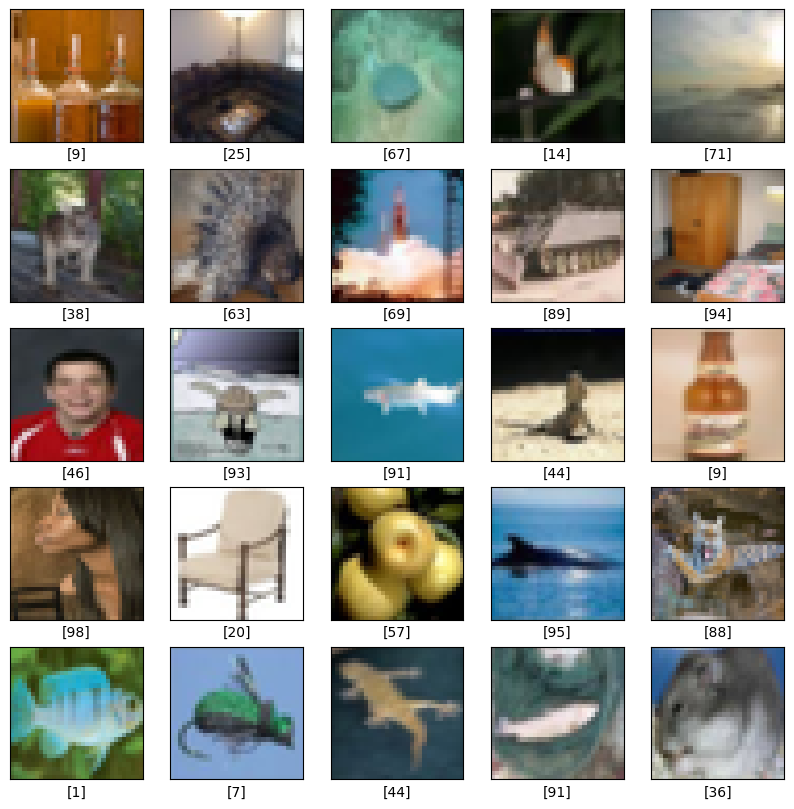

In [ ]:
show_random_examples(X_train, y_train)

# Data Preparation

# Task 4: Veri setini standartlaştırınız

# Task 4 Solution

In [ ]:
X_train, X_val = X_train / 255.0, X_val / 255.0

# Task 5: Tensorflow Dataset Oluşturunuz

# Task 5 Solution

In [ ]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# Model

# Task 6: Model yapısını oluşturunuz.

 Model yapısını dilediğiniz gibi oluşturabilirsiniz.

 Ana amacımız yüzde 70 accuracy üzerine çıkmak.

 İstediğiniz sayıda evrişim katmanı (Conv2D) ekleyebilirsiniz.

 Bu katmanlara istediğiniz sayılarda nöron girebilirsiniz.

 Ayrı ayrı 3 tane katman girebilirsiniz ya da blocklar oluşturabilirsiniz yani peş peşe 2 tane evrişim katmanı ekleyip ondan sonra max pooling yapıp sonra peş peşe örneğin 2 tane daha evrişim katmanı ekleyebilirsiniz.

 Tam bağlantılı katmanlarda da istediğiniz gibi deneme-yanılma yapabilirsiniz.

 İstediğiniz herhangi başka katmanları da ekleyebilirsiniz.

 70 üzerine en fazla kimin çıkabileceğini merak ediyorum!



# Task 6 Solution

In [ ]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),

    Flatten(),
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')

])

# Task 7: Modeli Compile ediniz.

# Task 7 Solution

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])


# Task 8: Callback yapılarını tanımlayınız.

# Task 8 Solution

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               verbose=1)

model_checkpoint = ModelCheckpoint(filepath='cifar10_model.keras',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   save_weights_only=False,
                                   verbose=1)

# Task 9: Modeli train ediniz.

# Task 9 Solution

In [ ]:
history = model.fit(train_ds,
                    epochs=1000,
                    validation_data=val_ds,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/1000
1556/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5906 - sparse_categorical_accuracy: 0.7925
Epoch 1: val_loss improved from inf to 1.06231, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.5906 - sparse_categorical_accuracy: 0.7925 - val_loss: 1.0623 - val_sparse_categorical_accuracy: 0.7756
Epoch 2/1000
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5803 - sparse_categorical_accuracy: 0.7964
Epoch 2: val_loss improved from 1.06231 to 0.90500, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.5803 - sparse_categorical_accuracy: 0.7964 - val_loss: 0.9050 - val_sparse_categorical_accuracy: 0.7817
Epoch 3/1000
1558/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5790 - sparse_categorical_accuracy: 0.7993
Epoch 3: val_loss did not improve from 0.90500
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.5790 - sparse_categorical_accuracy: 0.7993 - val_loss: 1.2149 - val_sparse_categoric

# Task 10: Model performansını değerlendiriniz

# Task 10 Solution

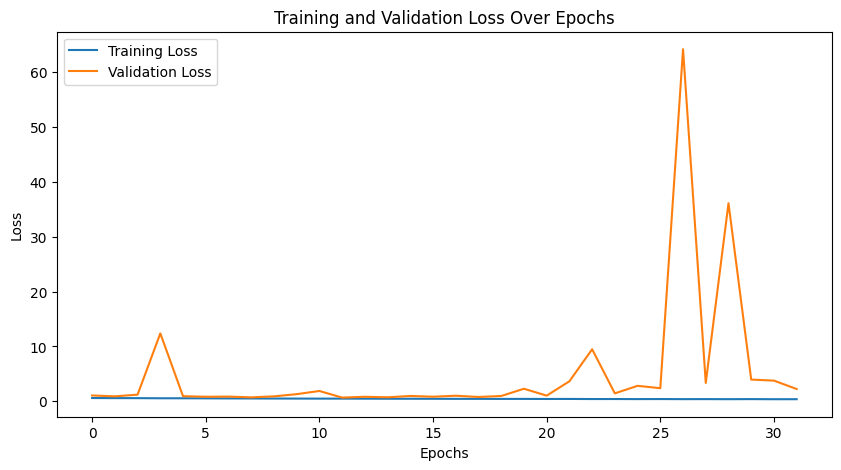

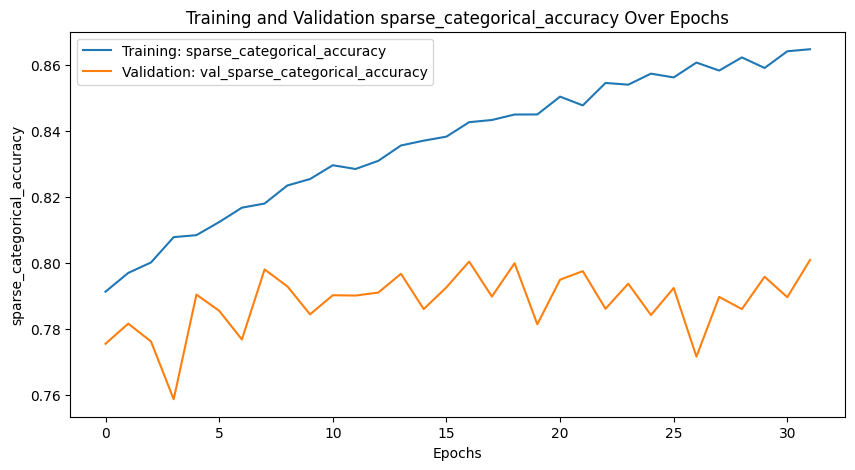

In [ ]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'{train_metric}')
    plt.legend()
    plt.show()

plot_training_history(history, train_loss='loss', train_metric='sparse_categorical_accuracy', val_loss='val_loss', val_metric='val_sparse_categorical_accuracy')



In [ ]:
val_loss, sparse_categorical_accuracy = model.evaluate(val_ds, verbose=0)
print(f"Loss: {val_loss}")
print(f"Accuracy: {sparse_categorical_accuracy}")


Loss: 2.241720199584961
Accuracy: 0.8009999990463257
